<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری سوم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
میتوانید در صورت نیاز بلوک جدیدی برای هر بخش اضافه کنید تا کد خوانا تر شود.
</p>
</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


in this section we will import all the libraries that we need in this assignment.
numpy for working with arrays and matrices.
pandas for working with dataframes.
matplotlib for plotting.
sklearn for machine learning algorithms.

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [3]:
train_df = pd.read_csv("Adult_TrainDataset.csv")
test_df = pd.read_csv("Adult_TestDataset.csv")

here we read the train and test datasets.

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
تحلیل و بررسی داده
</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مجموعه داده را با روش های مختلف از جمله رسم پلات های مختلف بررسی کنید تا یک شهود کلی نسبت به آن داشته باشید. 
</p>

</div>

In [4]:
train_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In this section we will analyze the data and try to get a general idea of the data.
df.head() returns the first 5 rows of the dataframe.

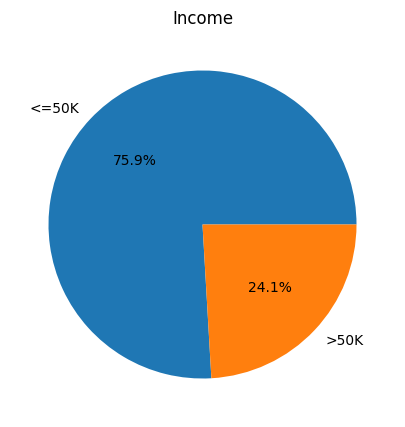

In [5]:
train_df.head()
plt.figure(figsize=(10,5))
plt.pie(train_df['Income'].value_counts(),labels=['<=50K','>50K'],autopct='%1.1f%%')
plt.title('Income')
plt.show()

In this section we will use the pie method to plot a pie chart of the Income column.

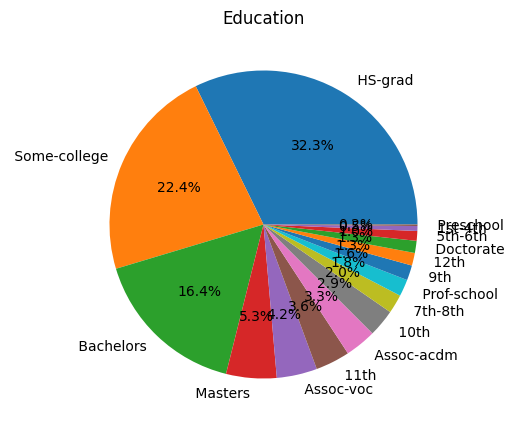

In [6]:
plt.figure(figsize=(10,5))
plt.pie(train_df['Education'].value_counts(),labels=train_df['Education'].value_counts().index,autopct='%1.1f%%')
plt.title('Education')
plt.show()

In this section we will use the pie method to plot a pie chart of the Education column.

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پیش پردازش داده
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این بخش با روش های مختلف داده هارا پردازش کرده و تغییرات لازم را روی داده لحاظ کرده تا دقت نهایی افزایش یابد.
</p>
</div>

In [10]:
train_df['Income'] = train_df['Income'].astype('category')
test_df['Income'] = test_df['Income'].astype('category')
label_encoder = LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype.name == 'object':
        train_df[col] = label_encoder.fit_transform(train_df[col])
for col in test_df.columns:
    if test_df[col].dtype.name == 'object':
        test_df[col] = label_encoder.fit_transform(test_df[col])
train_df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In this section we will use the LabelEncoder method to encode the categorical columns.
in this section we will use the astype method to change the type of the Income column to category.

<div dir="rtl">
<h2 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
آموزش مدل با روش های مختلف
</h2>
</div>
<div dir="rtl">
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دﺭ ﺁﻣﻮﺯﺵ ﻫﺮ ﻣﺪﻝ ، ﺩﺭ ﺻﻮﺭﺕ ﺗﻨﻈﻴﻢ ﻫﺎﻳﭙﺮﭘﺎﺭﺍﻣﺘﺮﻫﺎﻱ ﻣﺪﻝ ﺩﺭ ﻛﺘﺎﺑﺨﺎﻧﻪ sklearn، ﺩﻻﻳﻞ ﺍﻳﻦ ﺍﻧﺘﺨﺎﺏ ﻫﺎ ﻭ ﺗﺤﻠﻴﻞ
ﺧﻮﺩﺗﺎﻥ ﺭﺍ ﺍﺯ ﻧﺘﺎﻳﺢ ﺣﺎﺻﻞ ﺷﺪﻩ، ﮔﺰﺍﺭﺵ ﺩﻫﻴﺪ.</p>
</div>


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Support Vector Machine
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Support Vector Machine آموزش دهید.
</p>
</div>

In [12]:
svm = SVC()
svm.fit(train_df.drop('Income',axis=1),train_df['Income'])
svm_pred = svm.predict(test_df.drop('Income',axis=1))
print(classification_report(test_df['Income'],svm_pred))
print(confusion_matrix(test_df['Income'],svm_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     12435
           1       0.96      0.15      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.88      0.58      0.58     16281
weighted avg       0.83      0.80      0.74     16281

[[12413    22]
 [ 3250   596]]


in this section we will use the SVC method to train our model.
in this section we will use the predict method to predict the test data.
in this section we will use the classification_report method to print the classification report.
in this section we will use the confusion_matrix method to print the confusion matrix.

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
K-Nearest Neighbors</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از KNeighborsClassifier آموزش دهید.
</p>
</div>

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_df.drop('Income',axis=1),train_df['Income'])
knn_pred = knn.predict(test_df.drop('Income',axis=1))
print(classification_report(test_df['Income'],knn_pred))
print(confusion_matrix(test_df['Income'],knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     12435
           1       0.54      0.32      0.40      3846

    accuracy                           0.78     16281
   macro avg       0.68      0.62      0.63     16281
weighted avg       0.75      0.78      0.75     16281

[[11403  1032]
 [ 2613  1233]]


in this section we will use the KNeighborsClassifier method to train our model.
in this section we will use the predict method to predict the test data.
in this section we will use the classification_report method to print the classification report.
in this section we will use the confusion_matrix method to print the confusion matrix.

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Naive Bayes
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Naive Bayes آموزش دهید.
</p>
</div>

In [17]:
nb = GaussianNB()
nb.fit(train_df.drop('Income',axis=1),train_df['Income'])
nb_pred = nb.predict(test_df.drop('Income',axis=1))
print(classification_report(test_df['Income'],nb_pred))
print(confusion_matrix(test_df['Income'],nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
weighted avg       0.77      0.80      0.77     16281

[[11772   663]
 [ 2669  1177]]


in this section we will use the GaussianNB method to train our model.
in this section we will use the predict method to predict the test data.
in this section we will use the classification_report method to print the classification report.
in this section we will use the confusion_matrix method to print the confusion matrix.

<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Random Forest
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از RandomForestClassifier آموزش دهید.
</p>
</div>

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_df.drop('Income',axis=1),train_df['Income'])
rf_pred = rf.predict(test_df.drop('Income',axis=1))
print(classification_report(test_df['Income'],rf_pred))
print(confusion_matrix(test_df['Income'],rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.74      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

[[11630   805]
 [ 1528  2318]]


in this section we will use the RandomForestClassifier method to train our model.
in this section we will use the predict method to predict the test data.
in this section we will use the classification_report method to print the classification report.
in this section we will use the confusion_matrix method to print the confusion matrix.

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مقایسه مدل ها</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">

ﺩﺭ ﻧﻬﺎﻳﺖ ﺑﻌﺪ ﺍﺯ ﺁﻣﻮﺯﺵ ﻣﺪﻝ ﻫﺎ، ﺑﺮﺍﻱ ﺍﺭﺯﻳﺎﺑﻲ ﻋﻤﻠﻜﺮﺩ ﻣﺪﻝ ﻫﺎ، ﺍﺯ ﻣﺠﻤﻮﻋﻪ ﺩﺍﺩﻩ
<code> Adult_TestDataset </code>
ﺍﺳﺘﻔﺎﺩﻩ ﻧﻤﺎﻳﻴﺪ ﻭ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ
<code> (confusion matrix) </code>
ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ
<code> recall  </code>,
<code> precision  </code>,
<code> accuracy  </code>,
<code> f1-score    </code>
 ، ﺑﻪ ﺗﺤﻠﻴﻞ ﻧﺘﺎﻳﺞ ﺑﺪﺳﺖ ﺁﻣﺪﻩ ﺑﭙﺮﺩﺍﺯﻳﺪ. ﺗﻮﺟﻪ ﺩﺍﺷﺘﻪ ﺑﺎﺷﻴﺪ ﻛﻪ ﺑﺮﺍﻱ ﺳﺎﺩﮔﻲ ﻛﺎﺭ، ﻣﻲ ﺗﻮﺍﻧﻴﺪ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﺗﻮﺍﺑﻊ ﺁﻣﺎﺩﻩsklearn  ، ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ ﺭﺍ ﺑﺪﺳﺖ ﺁﻭﺭﻳﺪ.

</p>
</div>

In [20]:
print('SVM')
print(classification_report(test_df['Income'],svm_pred))
print(confusion_matrix(test_df['Income'],svm_pred))
print('KNN')
print(classification_report(test_df['Income'],knn_pred))
print(confusion_matrix(test_df['Income'],knn_pred))
print('NB')
print(classification_report(test_df['Income'],nb_pred))
print(confusion_matrix(test_df['Income'],nb_pred))
print('RF')
print(classification_report(test_df['Income'],rf_pred))
print(confusion_matrix(test_df['Income'],rf_pred))

SVM
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     12435
           1       0.96      0.15      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.88      0.58      0.58     16281
weighted avg       0.83      0.80      0.74     16281

[[12413    22]
 [ 3250   596]]
KNN
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     12435
           1       0.54      0.32      0.40      3846

    accuracy                           0.78     16281
   macro avg       0.68      0.62      0.63     16281
weighted avg       0.75      0.78      0.75     16281

[[11403  1032]
 [ 2613  1233]]
NB
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
w

<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما
</p>

SVM:
    High precision (0.96) for class 1, but very low recall (0.15). It's precise when it predicts class 1, but misses many class 1 instances.
    High precision and recall for class 0, indicating good performance on this class.
    Overall, the best accuracy (0.80), but its heavy bias towards class 0 might be a concern.

KNN:
    Lower precision and recall for class 1 compared to SVM, indicating it struggles with class 1 predictions.
    Decent performance for class 0 but not as good as SVM.
    Overall accuracy (0.78) is lower than SVM.

Naive Bayes:
    Better balance in precision and recall for class 1 compared to SVM and KNN.
    Good performance for class 0 but slightly worse than SVM.
    Overall accuracy (0.80) is on par with SVM, but it's more balanced across classes.

Random Forest:
    Highest recall for class 1 among all models, indicating it's better at identifying class 1 instances.
    Good precision and recall for class 0.
    Highest overall accuracy (0.86), suggesting it's the most effective model overall.

Summary: 
    SVM excels in accuracy but is heavily biased towards class 0.
    KNN shows moderate performance but struggles with class 1.
    Naive Bayes provides a more balanced approach between classes.
    Random Forest appears to be the best all-rounder, with strong performance in both classes and the highest overall accuracy.    

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر روش دیگری برای آموزش مدل را میتوانید در این بخش پیاده سازی نمایید ، اما لازمه آن فهم کامل آن روش هست پس در صورتی که روش دیگری را نیز پیاده سازی کردید فهم خود را از نتایج بدست آمده و خود روش بنویسید.
</p>

</div>



In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_df.drop('Income',axis=1),train_df['Income'])
mlp_pred = mlp.predict(test_df.drop('Income',axis=1))
print(classification_report(test_df['Income'],mlp_pred))
print(confusion_matrix(test_df['Income'],mlp_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     12435
           1       0.52      0.35      0.42      3846

    accuracy                           0.77     16281
   macro avg       0.67      0.63      0.64     16281
weighted avg       0.75      0.77      0.75     16281

[[11194  1241]
 [ 2482  1364]]


in this section we will use the MLPClassifier method to train our model.
we will use the predict method to predict the test data.
we will use the classification_report method to print the classification report.
we will use the confusion_matrix method to print the confusion matrix.

<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما از مدل امتیازی
</p>

Performance Metrics:
    Precision for class 0 (0.82) and class 1 (0.52) shows a decent ability to correctly identify positive cases, but it's better for class 0.
    Recall for class 0 (0.90) is high, meaning the model is good at identifying class 0 instances. However, recall for class 1 (0.35) is still low, indicating many class 1 instances are missed.
    The F1-score, which balances precision and recall, is good for class 0 (0.86) but not as strong for class 1 (0.42).
    The overall accuracy is 0.77, which is a reasonable figure but needs improvement, especially in correctly identifying class 1 instances.

Confusion Matrix:
    There are 11194 true positives and 1241 false negatives for class 0. This suggests the model is more inclined to correctly predict class 0.
    For class 1, there are 1364 true positives but a high number of false negatives (2482), which is consistent with the low recall for class 1.

Analysis:
    The model's ability to correctly predict class 1 instances (precision) has improved, but it still misses many of these instances (low recall).
    Compared to the other models (SVM, KNN, Naive Bayes, Random Forest), the MLP has shown progress but may still not be the best choice, especially if class 1's accurate identification is crucial.